### Problem Statement

In this challenge, you will work on a dataset that contains news headlines - which are aimed to be written in a sarcastic manner by the news author. Our job here is to build our NLP models and predict whether the headline is sarcastic or not.

Evaluation metrics - Accuracy score

In [1]:
!pip install contractions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud
import wordcloud
import string

import itertools
import collections
from collections import Counter

import nltk
import contractions
import re

import textblob

## for feature extraction

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [4]:
train = pd.read_csv('/content/Train_Dataset.csv')
test = pd.read_csv('/content/Test_Dataset.csv')

In [5]:
train.head()

,headline,is_sarcastic
0,supreme court votes 7-2 to legalize all worldl...,1
1,hungover man horrified to learn he made dozens...,1
2,emily's list founder: women are the 'problem s...,0
3,send your kids back to school with confidence,0
4,watch: experts talk pesticides and health,0


In [6]:
print('we have {} rows in our trainmset'.format(train.shape[0]))
print('we have {} columns in our train set'.format(train.shape[1]))

we have 44262 rows in our trainmset
we have 2 columns in our train set


In [7]:
print('we have {} rows in our test set'.format(test.shape[0]))
print('we have {} columns in our test set'.format(test.shape[1]))

we have 11066 rows in our test set
we have 1 columns in our test set


### EDA on the data

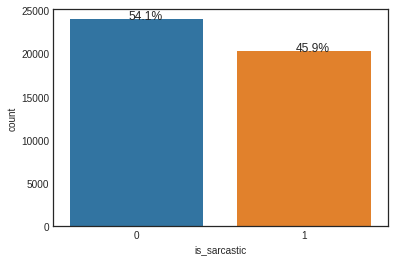

In [8]:
ax = sns.countplot(x='is_sarcastic', data=train, order = train['is_sarcastic'].value_counts().index)
without_hue(ax, train['is_sarcastic'])

The dataset is slightly balanced

In [9]:
train['headline'].iloc[6]

'u.s. dignity reserves nearly depleted'

## Analyze the data using wordcloud

In [ ]:
data_word = train['headline']
plt.figure(figsize = (20,20))
wc = WordCloud(stopwords=wordcloud.STOPWORDS, max_words = 5000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_word))
plt.imshow(wc,interpolation='bilinear')

The word cloud simply define that the headline is about a nation called american and consistent of EX president Donald Trump and Obama.

### Word cloud based on each label

1 - for sarcastic record

0 - for non sarcastic record

In [ ]:
sarcastic = train[train['is_sarcastic'] == 1].reset_index(drop=True)

non_sarcastic = train[train['is_sarcastic'] == 0].reset_index(drop=True)


In [ ]:
print(sarcastic.shape)
print(non_sarcastic.shape)

In [ ]:
sarcastic_word = sarcastic['headline']
plt.figure(figsize = (20,20))
wc = WordCloud(stopwords=wordcloud.STOPWORDS,max_words =5000 , width = 1600 , height = 800,background_color="white",
               collocations=False).generate(" ".join(sarcastic_word))
plt.imshow(wc, interpolation='bilinear')

Most word are new, man and report

In [ ]:
non_sarcastic_word = non_sarcastic['headline']
plt.figure(figsize = (20,20))
wc = WordCloud(stopwords=wordcloud.STOPWORDS,max_words = 5000 , width = 1600 , height = 800,background_color="white",
               collocations=False).generate(" ".join(non_sarcastic_word))
plt.imshow(wc, interpolation='bilinear')

Most word are focus on donald Trump

### Data Preprocessing

In this section we are going to clean our text data 

In [ ]:
# remove some stopwords to capture negation in n-grams if possible
stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('your')

# load up a for wordnet
wnl = nltk.stem.WordNetLemmatizer()

def simple_text_preprocessor(document): 
    # lower case
    document = str(document).lower()
    
    # expand contractions
    document = contractions.fix(document)
    
    # remove unnecessary characters
    document = re.sub(r'[^a-zA-Z]',r' ', document)
    document = re.sub(r'nbsp', r'', document)
    document = re.sub(' +', ' ', document)
    
    # simple porter stemming
    document = ' '.join([wnl.lemmatize(word) for word in document.split()])
    
    # stopwords removal
    document = ' '.join([word for word in document.split() if word not in stop_words])
    
    return document

clean_text = np.vectorize(simple_text_preprocessor)

The above function is inspired by **Dipanjan Sarkar**

In [ ]:
train['headline_clean'] = clean_text(train['headline'].values)
test['headline_clean'] = clean_text(test['headline'].values)

In [ ]:
train.head()

### Data Visualization2 

Check the top 10 words after removing noise (stopword) from the data.

In [ ]:
cw = pd.DataFrame(Counter(" ".join(train["headline_clean"]).split()).most_common(10),columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
cw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets ")

plt.show()

Top 10 common word in the whole headline

In [ ]:
new_sarcastic = train[train['is_sarcastic'] == 1].reset_index(drop=True)

new_non_sarcastic = train[train['is_sarcastic'] == 0].reset_index(drop=True)


In [ ]:
ns = pd.DataFrame(Counter(" ".join(new_sarcastic["headline_clean"]).split()).most_common(10),columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
ns.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets of sarcastic headline")

plt.show()

Top 10 common word found in sarcastic word.

In [ ]:
nns = pd.DataFrame(Counter(" ".join(new_non_sarcastic["headline_clean"]).split()).most_common(10),columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
nns.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="black")

ax.set_title("Common Words Found in Tweets of non_sarcastic word")

plt.show()

Top 10 word found in non sarcastic word

### Feature engineering 

1. The first pre-processing is to enrich the data using sentiment analysis of each text

2. counting the word text

3. Using count word

4. 

In [ ]:
train_sentiment_features = train['headline'].apply(lambda row: textblob.TextBlob(row).sentiment)
train['Polarity'] = [obj.polarity for obj in train_sentiment_features.values]
train['Subjectivity'] = [obj.subjectivity for obj in train_sentiment_features.values]

test_sentiment_features = test['headline'].apply(lambda row: textblob.TextBlob(row).sentiment)
test['Polarity'] = [obj.polarity for obj in test_sentiment_features.values]
test['Subjectivity'] = [obj.subjectivity for obj in test_sentiment_features.values]

In [ ]:
train.head()

In [ ]:
import string

train['char_count'] = train['headline'].apply(len)
train['word_count'] = train['headline'].apply(lambda x: len(x.split()))
train['word_density'] = train['char_count'] / (train['word_count']+1)
train['punctuation_count'] = train['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
train['title_word_count'] = train['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
train['upper_case_word_count'] = train['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


test['char_count'] = test['headline'].apply(len)
test['word_count'] = test['headline'].apply(lambda x: len(x.split()))
test['word_density'] = test['char_count'] / (test['word_count']+1)
test['punctuation_count'] = test['headline'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
test['title_word_count'] = test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
test['upper_case_word_count'] = test['headline'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

## Using bag of words with N-gram

In [ ]:
CV = CountVectorizer(min_df=0.0, max_df=1.0)
trainCV = CV.fit_transform(train['headline_clean']).toarray()
trainCV = pd.DataFrame(trainCV, columns=CV.get_feature_names())

testCV = CV.fit_transform(test['headline_clean']).toarray()
testCV = pd.DataFrame(testCV, columns=CV.get_feature_names())
trainCV.head()

### Using TF-idf features

tfv = TfidfVectorizer(
            stop_words = 'english')

traintfv = tfv.fit_transform(train['headline_clean']).toarray()
traintfv = pd.DataFrame(traintfv, columns=tfv.get_feature_names())

testtfv = tfv.fit_transform(test['headline_clean']).toarray()
testtfv = pd.DataFrame(testtfv, columns=tfv.get_feature_names())
traintfv.head()

In [ ]:
nnnn

 ## combining the data

In [ ]:
data = pd.concat([train, trainCV], axis=1)
test_data = pd.concat([test, testCV], axis=1)